In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [13]:
data['returns'] =  np.log(data['Adj Close']/data['Adj Close'].shift(1))
data['volatility'] = data['returns'].rolling(window=22).std()
data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,volatility
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002515,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.081723,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.134312,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.175470,NaN


Text(0.5, 1.0, 'TSLA Monthly Volatility')

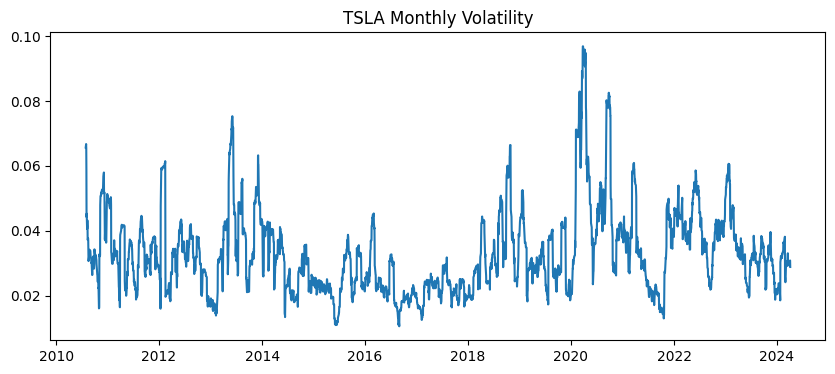

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(data['volatility'])
plt.title("TSLA Monthly Volatility")

In [24]:
def ADF_Cal(x):
    """ 
    Testing the Null Hypothesis that the series is NOT Stationary
    Reject -> True -> The Serires IS stationary and vice versa
    """
    result = adfuller(x)
    ADF_stat = result[0]
    p = result[1]
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))

In [25]:
ADF_Cal(data['volatility'].dropna())

ADF Statistic: -5.000250
p-value: 0.000022
Critical Values
	1%: -3.432
Reject H0: True


# ARMA Model

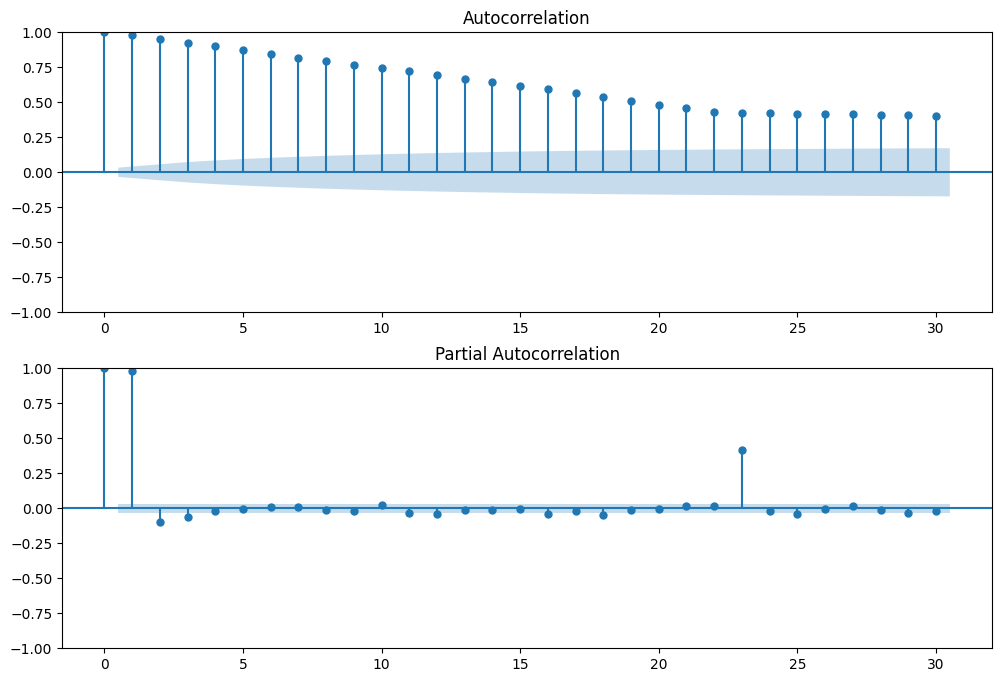

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['volatility'].dropna(), ax=ax1, lags = 30)
plot_pacf(data['volatility'].dropna(), ax=ax2, lags = 30)
plt.show()